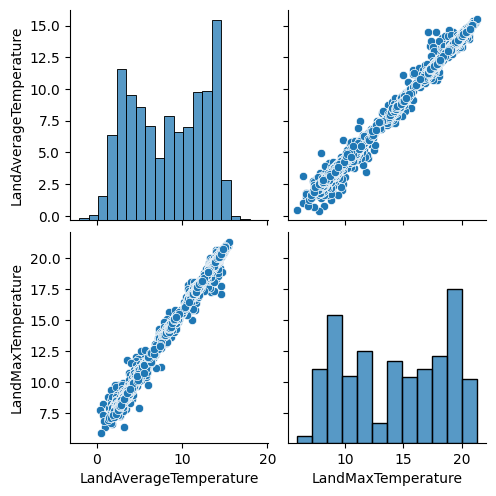

In [8]:
#Find two feature in my dataset.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/GlobalTemperatures.csv')

# Select a subset of features
selected_features = [
    'LandAverageTemperature',
    'LandMaxTemperature',

]

# Pairplot to visualize relationships
sns.pairplot(data[selected_features], kind='scatter')
plt.show()



In [62]:
import pandas as pd

# Drop rows with NaN values
data_without_nan = data.dropna()

# Print the resulting table
print(data_without_nan)


              dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
1200  1850-01-01                   0.749                              1.105   
1201  1850-02-01                   3.071                              1.275   
1202  1850-03-01                   4.954                              0.955   
1203  1850-04-01                   7.217                              0.665   
1204  1850-05-01                  10.004                              0.617   
...          ...                     ...                                ...   
3187  2015-08-01                  14.755                              0.072   
3188  2015-09-01                  12.999                              0.079   
3189  2015-10-01                  10.801                              0.102   
3190  2015-11-01                   7.433                              0.119   
3191  2015-12-01                   5.518                              0.100   

      LandMaxTemperature  LandMaxTemperatureUncerta

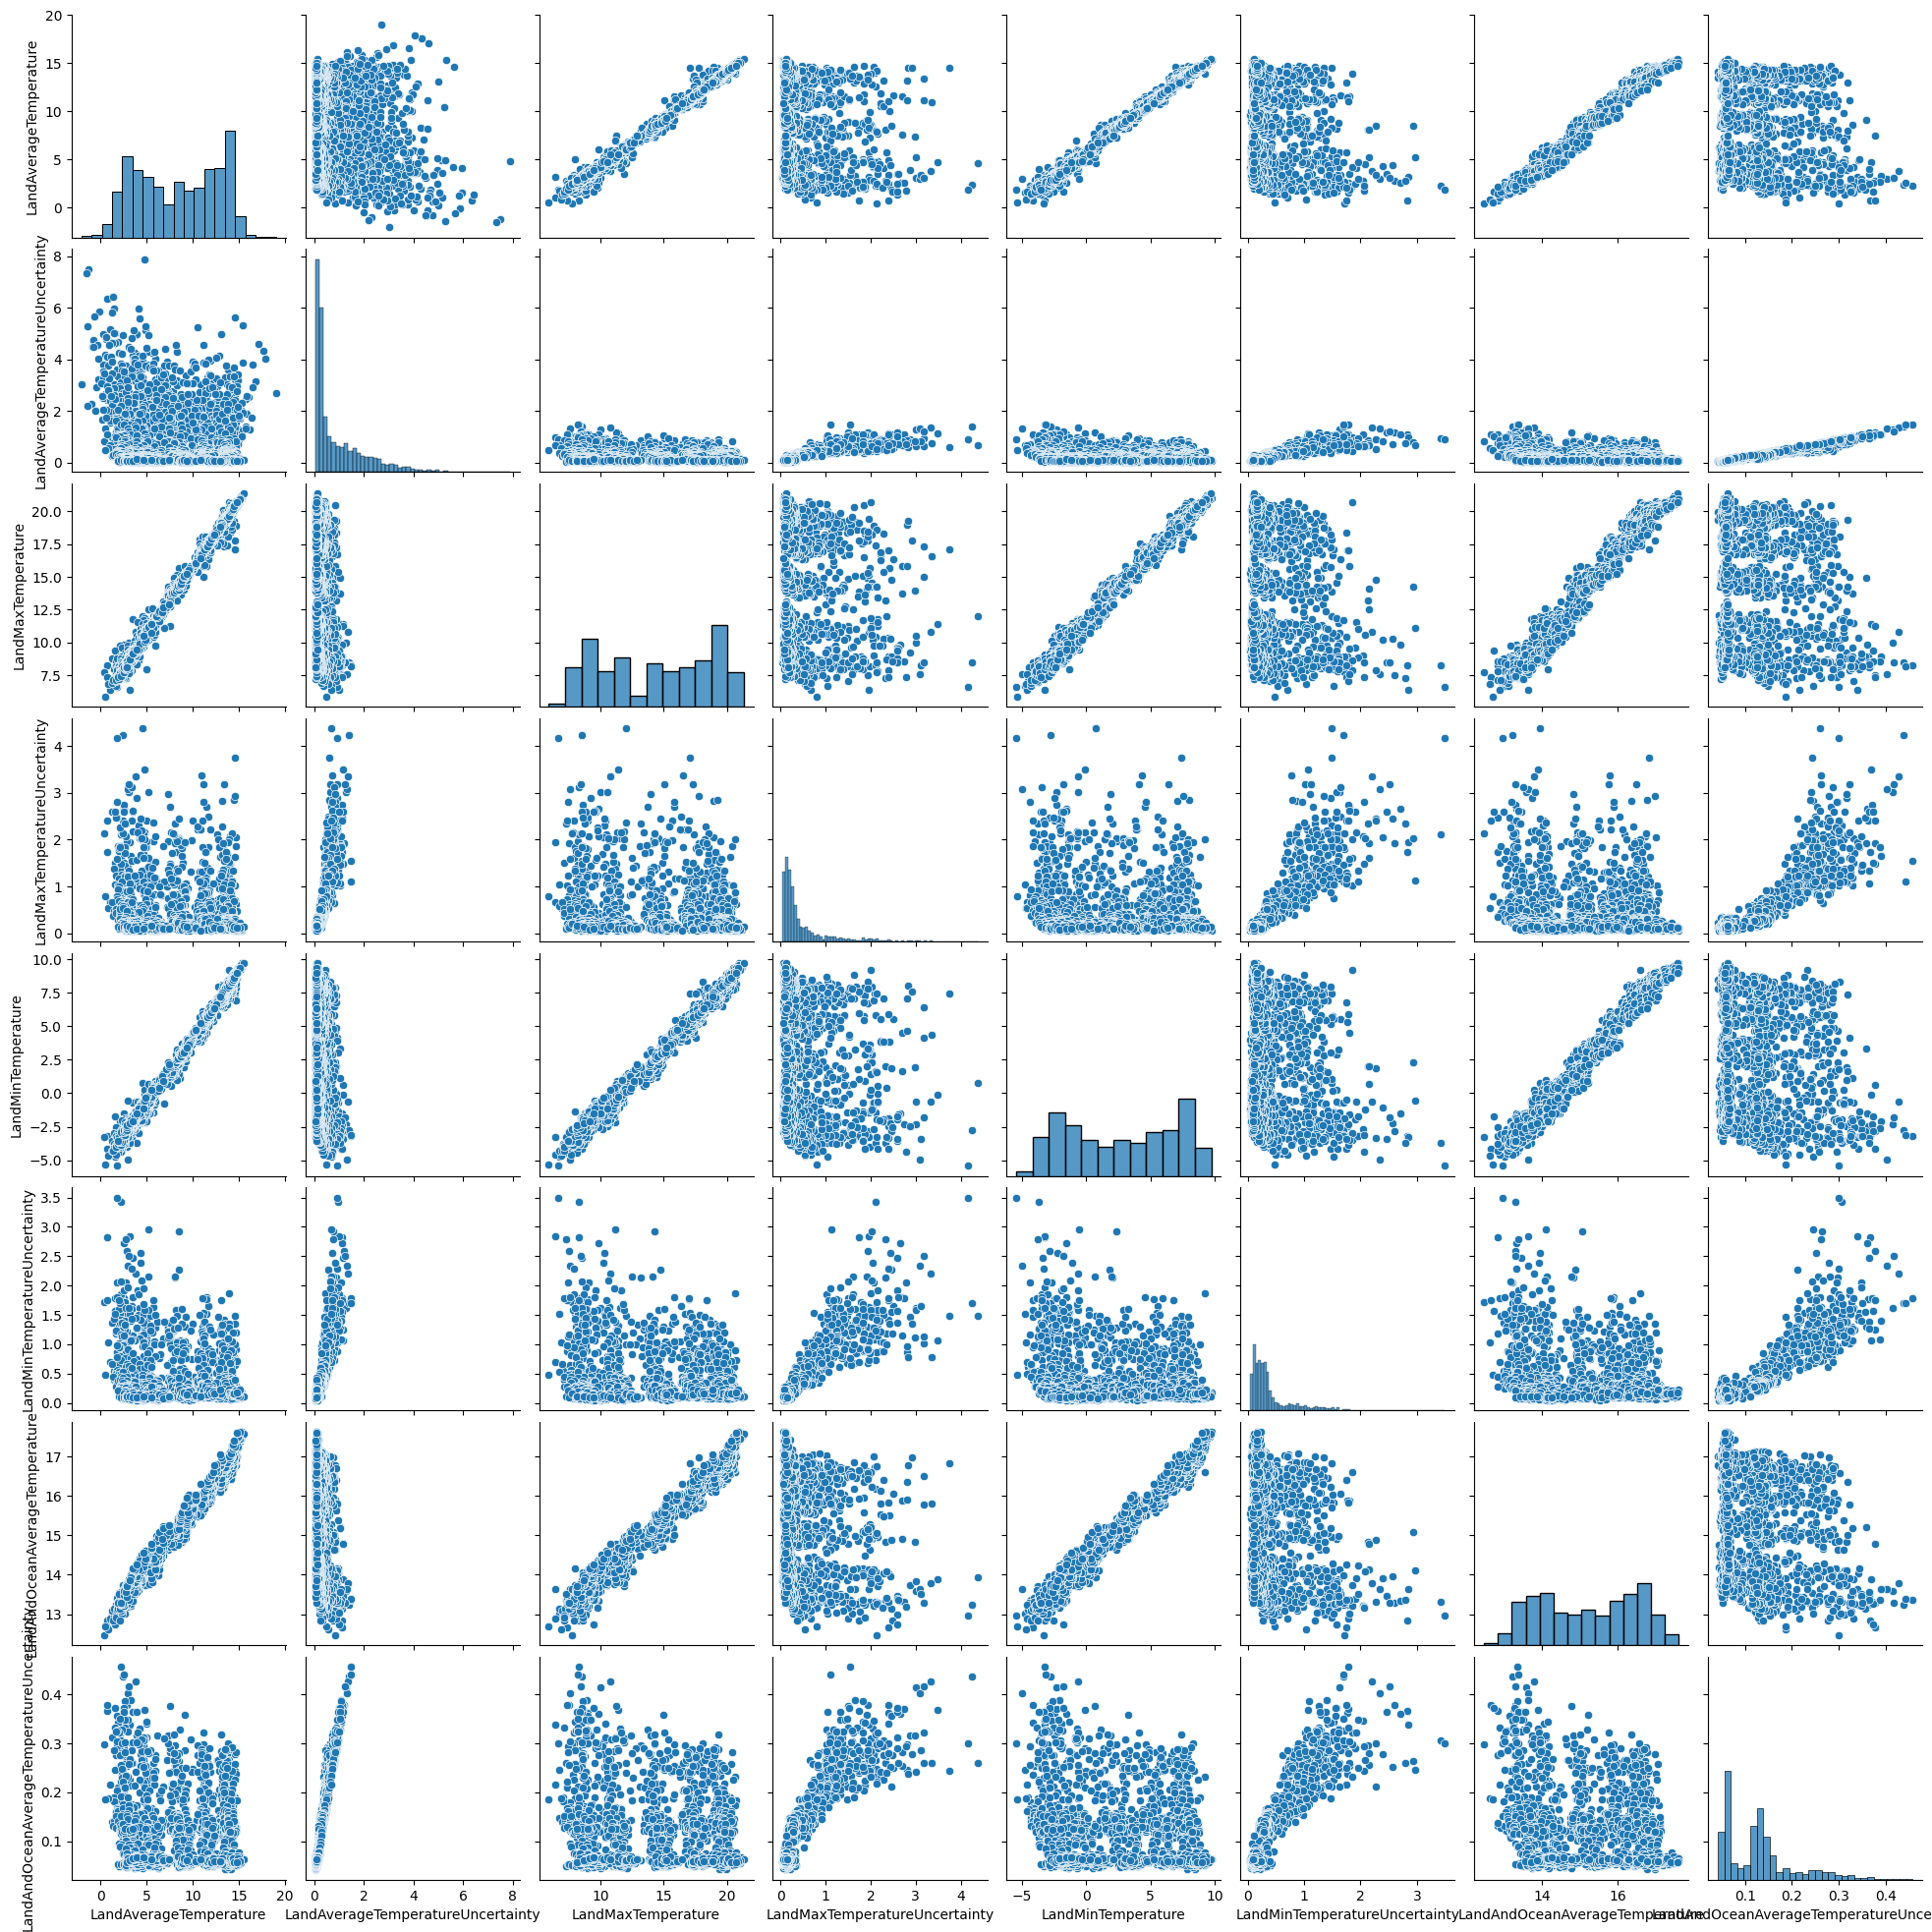

In [63]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Select specific columns
selected_columns = ['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
                    'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
                    'LandMinTemperature', 'LandMinTemperatureUncertainty',
                    'LandAndOceanAverageTemperature',
                    'LandAndOceanAverageTemperatureUncertainty']

# Subset the DataFrame with selected columns
selected_data = data[selected_columns]

# Create pairwise scatterplots
sns.pairplot(selected_data)
plt.show()


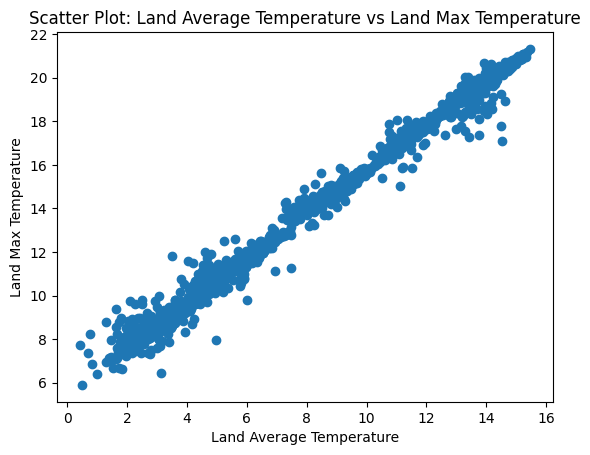

In [11]:
import matplotlib.pyplot as plt

plt.scatter(data['LandAverageTemperature'], data['LandMaxTemperature'])
plt.xlabel('Land Average Temperature')
plt.ylabel('Land Max Temperature')
plt.title('Scatter Plot: Land Average Temperature vs Land Max Temperature')
plt.show()


                        LandAverageTemperature  LandMaxTemperature
LandAverageTemperature                1.000000            0.995807
LandMaxTemperature                    0.995807            1.000000


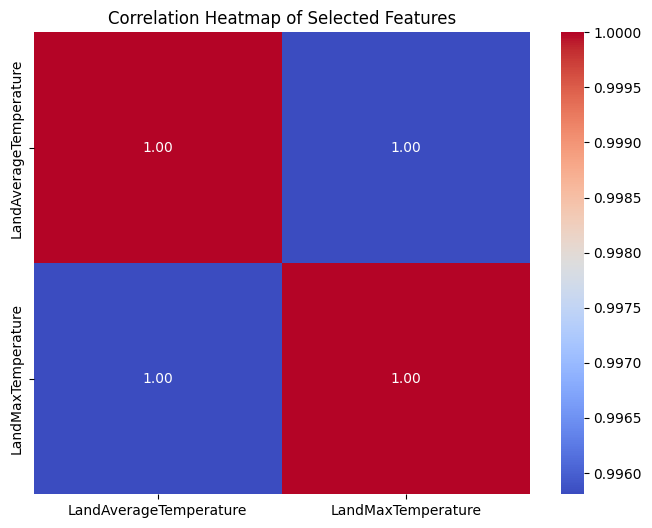

In [12]:
# Extract the selected features
selected_data = data[selected_features]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Display the correlation matrix
print(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Features')
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Features and target variable
features = ['LandAverageTemperature']
target = 'LandMaxTemperature'

# Extract features and target variable
X = data[features]
y = data[target]

# Initialize the SimpleImputer and fit it to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Initialize the SimpleImputer and fit it to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model with imputed data
model.fit(X_imputed, y_imputed)

# Get the coefficients (slope) and intercept
coefficients = model.coef_
intercept = model.intercept_

print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")
# Get the coefficients (slopes) for each predictor variable
slopes = model.coef_

# Print the slopes for each predictor variable
for i, slope in enumerate(slopes):
    print(f"Slope for Predictor {i+1}: {slope}")


Coefficients: [0.59692238]
Intercept: 9.351536463007708
Slope for Predictor 1: 0.5969223801657567


In [14]:

# Make predictions on the test set
da_predictions = model.predict(X_imputed)

# Make predictions on the test set
ml_predictions = model.predict(X_imputed)


true_values = y_imputed

In [15]:
import pandas as pd


# Select the columns for which you want to find correlations
selected_columns = ['LandAverageTemperature', 'LandMaxTemperature']

# Create a subset DataFrame with the selected columns
subset_data = data[selected_columns]

# Calculate the correlation matrix
correlation_matrix = subset_data.corr()

print(correlation_matrix)


                        LandAverageTemperature  LandMaxTemperature
LandAverageTemperature                1.000000            0.995807
LandMaxTemperature                    0.995807            1.000000


Coefficient of determination (R-squared): 0.5880215281554846


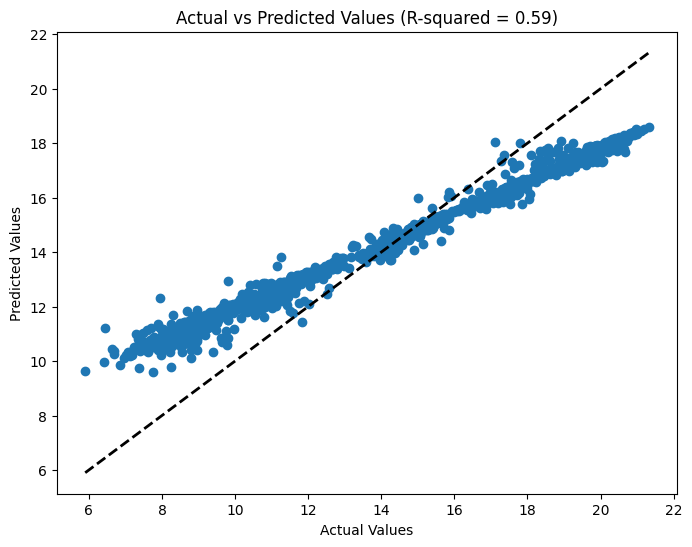

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# and have X (features) and y (target variable)

# Fit the model
model.fit(X_imputed, y_imputed)

# Make predictions
predictions = model.predict(X_imputed)

# Calculate R-squared
r_squared = r2_score(y_imputed, predictions)
print("Coefficient of determination (R-squared):", r_squared)

# Plotting actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (R-squared = {:.2f})'.format(r_squared))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line for reference
plt.show()


In [17]:
X = data[['LandAverageTemperature']]  # Adjust this according to your model's input features

# Perform predictions using the model


In [18]:
from sklearn.metrics import r2_score
import numpy as np

# Replace y_true and y_pred with your actual and predicted values
y_true = y_imputed
  # Actual target values
y_pred = model.predict(X_imputed) # Predicted values from your model

# Calculate the correlation coefficient
correlation = np.corrcoef(y_true, y_pred)[0, 1]

# Calculate the determinacy coefficient (R^2)
determinacy = r2_score(y_true, y_pred)

print(f"Correlation coefficient: {correlation}")
print(f"Determinacy coefficient (R^2): {determinacy}")


Correlation coefficient: 0.7668256178268203
Determinacy coefficient (R^2): 0.5880215281554846


In [19]:

new_predictors = [[0.749  ], [3.071 ], [4.954 ], [7.217]]  # Example predictor values

# Make predictions
predictions = model.predict(new_predictors)

# Display predicted LandMaxTemperature values
for predictor, prediction in zip(new_predictors, predictions):
    print(f"Predictor value: {predictor}, Predicted LandMaxTemperature: {prediction}")

    #8.242  9.970 10.347 12.934


Predictor value: [0.749], Predicted LandMaxTemperature: 9.79863132575186
Predictor value: [3.071], Predicted LandMaxTemperature: 11.184685092496746
Predictor value: [4.954], Predicted LandMaxTemperature: 12.308689934348866
Predictor value: [7.217], Predicted LandMaxTemperature: 13.659525280663974


In [20]:
# Example coefficients and intercept
m1 = 0.59692238
b = 9.351536463007708

# Example predictor values
predictor1 = 0.5969223801657567


# Calculate LandMaxTemperature using the formula
land_max_temperature = m1 * predictor1 + b
print(f"Predicted LandMaxTemperature: {land_max_temperature}")


Predicted LandMaxTemperature: 9.707852790851517


In [21]:
import numpy as np


# Calculate Mean Relative Absolute Error for DA approach
da_errors = np.abs(da_predictions - true_values) / true_values
da_mrae = da_errors.mean()

# Calculate Mean Relative Absolute Error for ML approach
ml_errors = np.abs(ml_predictions - true_values) / true_values
ml_mrae = ml_errors.mean()

print(f"Mean Relative Absolute Error for DA approach: {da_mrae}")
print(f"Mean Relative Absolute Error for ML approach: {ml_mrae}")


Mean Relative Absolute Error for DA approach: 0.14417666757165506
Mean Relative Absolute Error for ML approach: 0.14417666757165506


In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

selected_features = data[['LandAverageTemperature', 'LandMaxTemperature', 'LandMinTemperature', 'LandAndOceanAverageTemperature']]  # Replace with your selected features
# Drop rows with missing values in the selected features
cleaned_data = selected_features.dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_data)


In [25]:
# Compute the scatter matrix
scatter_matrix = np.cov(scaled_data.T)



In [26]:
from numpy.linalg import svd

# Perform SVD
U, s, Vt = svd(scaled_data)


In [27]:
# Calculate percentage contribution of each principal component
explained_variance_ratio = (s ** 2) / np.sum(s ** 2)
percent_contributions = explained_variance_ratio * 100

print("Percentage Contribution of Principal Components:")
for i, percent in enumerate(percent_contributions):
    print(f"PC{i+1}: {percent:.2f}%")


Percentage Contribution of Principal Components:
PC1: 99.29%
PC2: 0.47%
PC3: 0.16%
PC4: 0.08%


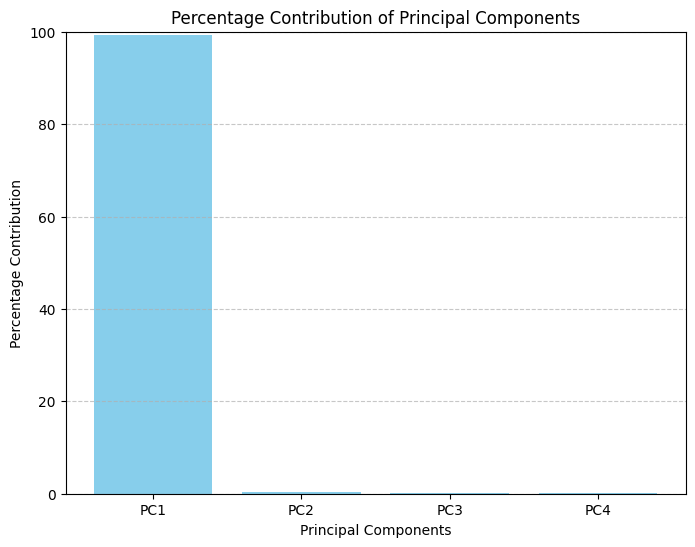

In [28]:
import matplotlib.pyplot as plt

# Principal component labels
components = ['PC1', 'PC2', 'PC3', 'PC4']

# Percentage contribution values
contributions = [99.29, 0.47, 0.16, 0.08]

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(components, contributions, color='skyblue')
plt.xlabel('Principal Components')
plt.ylabel('Percentage Contribution')
plt.title('Percentage Contribution of Principal Components')
plt.ylim(0, 100)  # Set y-axis limit to percentage range
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [29]:
import pandas as pd

# Calculate the minimum and maximum values for the selected columns
min_vals = cleaned_data.min()
max_vals = cleaned_data.max()

# Perform range normalization for the selected columns
range_normalized_data = (cleaned_data - min_vals) / (max_vals - min_vals)

# 'range_normalized_data' now holds the range-normalized values for the selected columns
print(f"The range of the dataset is: {range_normalized_data}")


The range of the dataset is:       LandAverageTemperature  LandMaxTemperature  LandMinTemperature  \
1200                0.022881            0.151881            0.145550   
1201                0.176880            0.263943            0.206057   
1202                0.301764            0.288392            0.231583   
1203                0.451850            0.456161            0.424878   
1204                0.636689            0.632620            0.609575   
...                      ...                 ...                 ...   
3187                0.951784            0.959728            0.953049   
3188                0.835323            0.839494            0.833620   
3189                0.689548            0.684176            0.703545   
3190                0.466176            0.453437            0.500198   
3191                0.339170            0.312905            0.376537   

      LandAndOceanAverageTemperature  
1200                        0.069704  
1201                        

In [30]:
from sklearn.decomposition import PCA
import numpy as np


# It should be a NumPy array or DataFrame containing your preprocessed data

# Initialize PCA with 2 components for visualization
pca = PCA(n_components=2)

# Fit PCA on the range-normalized data
pca.fit(range_normalized_data)

# Transform the data into the principal components
principal_components = pca.transform(range_normalized_data)

# 'principal_components' now holds the transformed data with reduced dimensions
# You can further use this for visualization or analysis


In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(cleaned_data)

# Apply PCA with two components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(standardized_data)

# 'pca_data' now contains the PCA-transformed data with two components
print(f"The pca_data of the dataset is: {pca_data }")

The pca_data of the dataset is: [[ 3.27630426  0.3023267 ]
 [ 2.39716075  0.12406358]
 [ 1.90755162 -0.03379915]
 ...
 [-1.22705203 -0.27525945]
 [ 0.35840464 -0.25442974]
 [ 1.24734352 -0.33863221]]


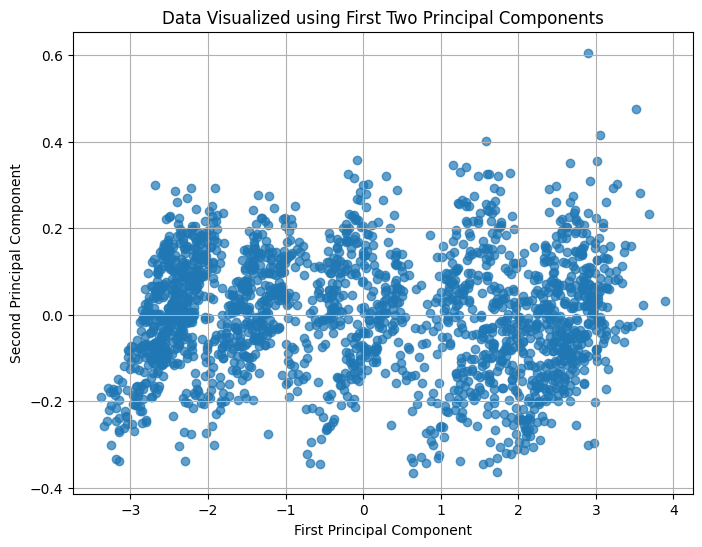

In [32]:
import matplotlib.pyplot as plt

# Plotting the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Data Visualized using First Two Principal Components')
plt.grid(True)
plt.show()


In [33]:
from sklearn.cluster import KMeans

# You can perform K-means clustering to generate labels
kmeans = KMeans(n_clusters=4)  # Specify the number of clusters
labels = kmeans.fit_predict(pca_data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


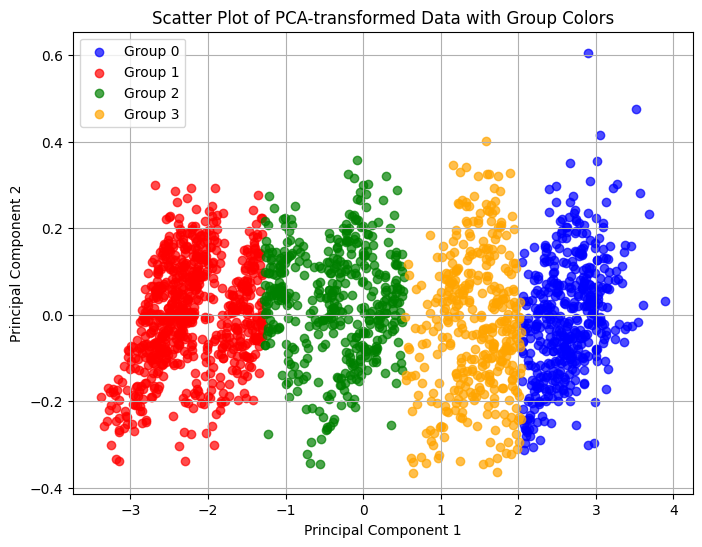

In [34]:
import matplotlib.pyplot as plt
import numpy as np


unique_labels = np.unique(labels)

# Define a color map or a list of colors for each unique group
colors = ['blue', 'red', 'green', 'orange']  # Add more colors as needed

plt.figure(figsize=(8, 6))

# Scatter plot with distinct colors for each group
for i, label in enumerate(unique_labels):
    indices = np.where(labels == label)
    plt.scatter(
        pca_data[indices, 0],
        pca_data[indices, 1],
        label=f'Group {label}',
        alpha=0.7,
        color=colors[i],
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of PCA-transformed Data with Group Colors')
plt.legend()
plt.grid(True)
plt.show()


In [35]:
from sklearn.preprocessing import StandardScaler

# Assuming 'cleaned_data' contains your data without NaN values
scaler = StandardScaler()
z_score_standardized_data = scaler.fit_transform(cleaned_data)
print(f"The Z_score of the dataset is: {z_score_standardized_data}")


The Z_score of the dataset is: [[-1.83537261 -1.41780318 -1.43198391 -1.86812372]
 [-1.29057362 -1.01673525 -1.21175628 -1.2753965 ]
 [-0.84877496 -0.92923375 -1.11885151 -0.91819002]
 ...
 [ 0.52307675  0.48726947  0.59892399  0.8458604 ]
 [-0.26713987 -0.33854053 -0.14118526  0.0309586 ]
 [-0.71644653 -0.84150014 -0.59126795 -0.34430446]]


In [36]:
from sklearn.decomposition import PCA

# Perform PCA with two components
pca = PCA(n_components=2)
pca.fit(z_score_standardized_data)

# Transform the data into the PCA space
pca_transformed_data = pca.transform(z_score_standardized_data)


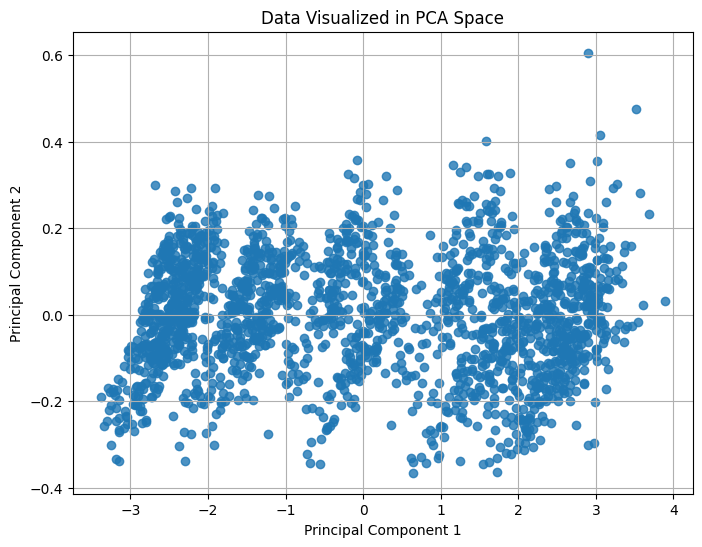

In [37]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))

# Scatter plot using the first two principal components
plt.scatter(pca_transformed_data[:, 0], pca_transformed_data[:, 1], alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Visualized in PCA Space')

plt.grid()
plt.show()


The pcs transformed of the dataset is: [[11.72107284 -0.13878298]
 [ 8.75699093 -0.61644776]
 [ 7.17006012 -0.53830979]
 ...
 [-4.05678655  0.38111135]
 [ 1.81415579  0.62827019]
 [ 5.28423896  0.80227912]]


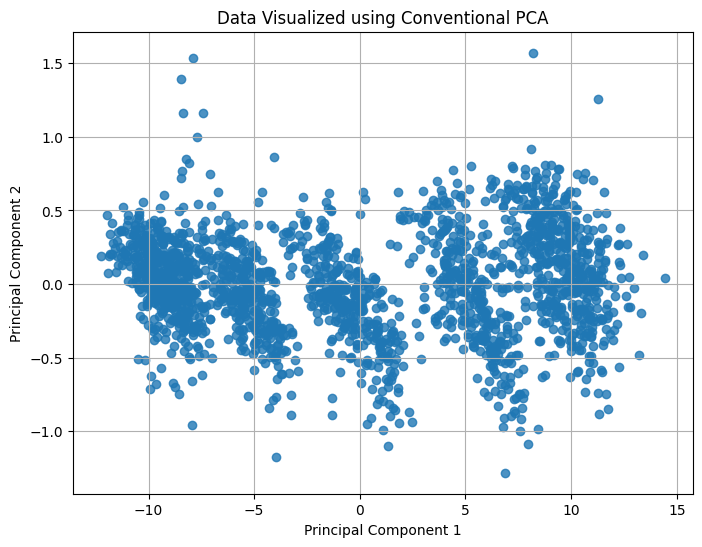

In [38]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA(n_components=2)  # Specify the number of components

# Fit PCA to the cleaned_data
pca.fit(cleaned_data)

# Transform the data into the PCA space
pca_transformed_data = pca.transform(cleaned_data)

print(f"The pcs transformed of the dataset is: {pca_transformed_data }")

# Plotting the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(pca_transformed_data[:, 0], pca_transformed_data[:, 1], alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Visualized using Conventional PCA')
plt.grid()
plt.show()


In [40]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_data)

# Calculate the mean or median across the features for each row
ranking_factor = scaled_data.mean(axis=1)  # You can use .median() instead of .mean() if preferred

# Normalize the ranking factor to a 0-100 scale
normalized_ranking = (ranking_factor - ranking_factor.min()) / (ranking_factor.max() - ranking_factor.min()) * 100

# Assign the normalized ranking to a new column in the DataFrame using .loc
cleaned_data.loc[:, 'Ranking'] = normalized_ranking

# Print the ranking factor and the normalized rankings
print("Ranking Factor:")
print(ranking_factor)
print("\nNormalized Rankings (0-100 scale):")
print(normalized_ranking)

Ranking Factor:
[-1.63949145 -1.19947183 -0.95444403 ...  0.6142212  -0.17910464
 -0.62382518]

Normalized Rankings (0-100 scale):
[ 8.39325981 20.49673817 27.23663933 ... 70.38541072 48.56365114
 36.33086608]


<ipython-input-40-05ba3726a272>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.loc[:, 'Ranking'] = normalized_ranking


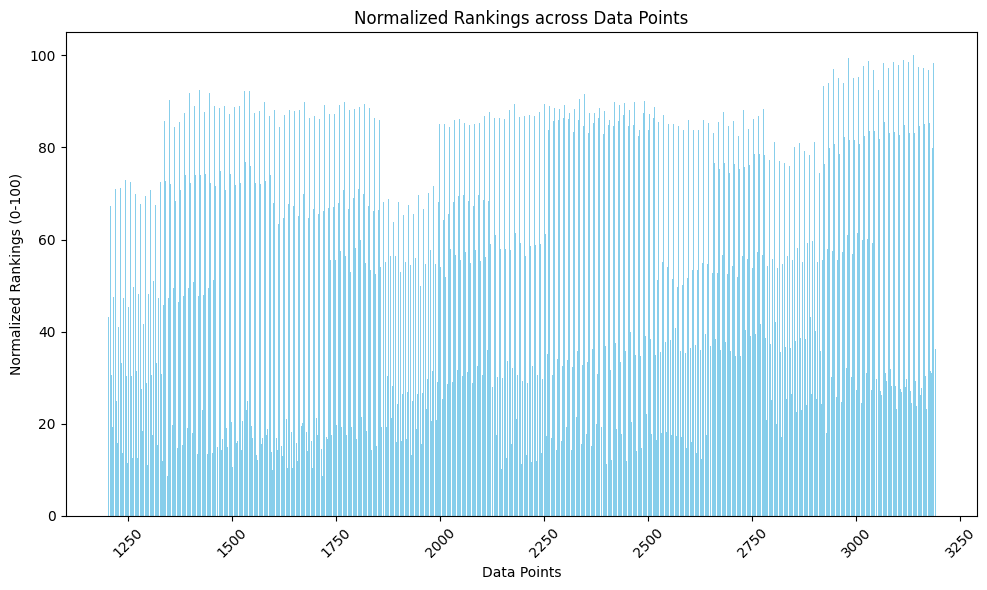

In [41]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.bar(cleaned_data.index, normalized_ranking, color='skyblue')
plt.xlabel('Data Points')
plt.ylabel('Normalized Rankings (0-100)')
plt.title('Normalized Rankings across Data Points')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [42]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

selected_features = data[['LandAverageTemperature', 'LandMaxTemperature', 'LandMinTemperature']]  # Replace with your selected features
# Drop rows with missing values in the selected features
cleaned_data = selected_features.dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_data)

In [51]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np



selected_features = data[['LandAverageTemperature', 'LandMaxTemperature', 'LandMinTemperature']]  # Replace with your selected features
# Drop rows with missing values in the selected features
cleaned_data = selected_features.dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_data)

# Perform K-means clustering for K=4 and K=7
k_values = [4, 7]
results = {}

for k in k_values:
    cluster_results = []
    for i in range(10):
        # Run K-means clustering
        kmeans = KMeans(n_clusters=k, init='random', n_init=1)
        kmeans.fit(scaled_data)
        cluster_results.append(kmeans.inertia_)  # Recording the criterion value
    results[k] = cluster_results

# Choosing the best runs for K=4 and K=7
best_runs = {k: np.min(v) for k, v in results.items()}
best_k4_run = np.argmin(results[4])
best_k7_run = np.argmin(results[7])

# Retrieve cluster centers for the best runs
kmeans_best_k4 = KMeans(n_clusters=4, init='random', n_init=1, random_state=best_k4_run)
kmeans_best_k4.fit(scaled_data)
centers_k4 = kmeans_best_k4.cluster_centers_

kmeans_best_k7 = KMeans(n_clusters=7, init='random', n_init=1, random_state=best_k7_run)
kmeans_best_k7.fit(scaled_data)
centers_k7 = kmeans_best_k7.cluster_centers_

# Compute the grand mean of the standardized data
grand_mean = scaled_data.mean(axis=0)

# Calculate relative differences for K=4 clusters
relative_diff_k4 = centers_k4 - grand_mean

# Calculate relative differences for K=7 clusters
relative_diff_k7 = centers_k7 - grand_mean

# Display or print the results
print("Grand Mean for Selected Features (Standardized):")
print(grand_mean)

print("\nRelative Differences for K=4 clusters:")
print(relative_diff_k4)

print("\nRelative Differences for K=7 clusters:")
print(relative_diff_k7)


Grand Mean for Selected Features (Standardized):
[-2.85358528e-17  3.56698161e-17 -7.13396321e-18]

Relative Differences for K=4 clusters:
[[-0.7160032  -0.71210146 -0.71859613]
 [ 0.17623287  0.1953575   0.14324563]
 [-1.31373523 -1.32509003 -1.29323128]
 [ 1.09534413  1.08959869  1.10262087]]

Relative Differences for K=7 clusters:
[[ 8.74080842e-01  8.66729244e-01  8.70335690e-01]
 [-6.22759231e-01 -6.25587144e-01 -6.08455757e-01]
 [-1.40178656e+00 -1.40495085e+00 -1.39199296e+00]
 [-1.03320297e+00 -1.04144792e+00 -1.02559538e+00]
 [ 2.81233893e-02  5.37751472e-02  5.06977336e-05]
 [ 1.26530053e+00  1.25661142e+00  1.28007592e+00]
 [ 5.56764974e-01  5.66143405e-01  5.25548623e-01]]


In [53]:


# Creating the contingency table
contingency_table = pd.crosstab(data['LandAndOceanAverageTemperature'], data['LandAndOceanAverageTemperatureUncertainty'])

# Displaying the contingency table
print("Contingency Table:")
print(contingency_table)


Contingency Table:
LandAndOceanAverageTemperatureUncertainty  0.042  0.043  0.045  0.046  0.047  \
LandAndOceanAverageTemperature                                                 
12.475                                         0      0      0      0      0   
12.620                                         0      0      0      0      0   
12.658                                         0      0      0      0      0   
12.702                                         0      0      0      0      0   
12.732                                         0      0      0      0      0   
...                                          ...    ...    ...    ...    ...   
17.578                                         0      0      0      0      0   
17.589                                         0      0      0      0      0   
17.607                                         0      0      0      0      0   
17.609                                         0      0      0      0      0   
17.611               

In [54]:


# Counting occurrences of combinations
occurrences = data.groupby(['LandAndOceanAverageTemperature', 'LandAndOceanAverageTemperatureUncertainty']).size()

# Displaying the occurrences
print("Occurrences of Combinations:")
print(occurrences)


Occurrences of Combinations:
LandAndOceanAverageTemperature  LandAndOceanAverageTemperatureUncertainty
12.475                          0.299                                        1
12.620                          0.187                                        1
12.658                          0.378                                        1
12.702                          0.186                                        1
12.732                          0.372                                        1
                                                                            ..
17.578                          0.067                                        1
17.589                          0.057                                        1
17.607                          0.064                                        1
17.609                          0.062                                        1
17.611                          0.058                                        1
Length: 1987, dtype: int64


In [55]:
# Calculate conditional probabilities
conditional_probs = occurrences.div(occurrences.sum(level=0), axis=0)

# Display conditional probabilities
print("Conditional Probabilities:")
print(conditional_probs)


Conditional Probabilities:
LandAndOceanAverageTemperature  LandAndOceanAverageTemperatureUncertainty
12.475                          0.299                                        1.0
12.620                          0.187                                        1.0
12.658                          0.378                                        1.0
12.702                          0.186                                        1.0
12.732                          0.372                                        1.0
                                                                            ... 
17.578                          0.067                                        1.0
17.589                          0.057                                        1.0
17.607                          0.064                                        1.0
17.609                          0.062                                        1.0
17.611                          0.058                                        1.0
Length: 

<ipython-input-55-c0e50f176fed>:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  conditional_probs = occurrences.div(occurrences.sum(level=0), axis=0)


In [57]:


# Counting occurrences of combinations
occurrences = data.groupby(['LandAndOceanAverageTemperature', 'LandAndOceanAverageTemperatureUncertainty']).size()

# Calculate conditional probabilities
conditional_probs = occurrences.div(occurrences.groupby(level=0).sum())

# Display conditional probabilities
print("Conditional Probabilities:")
print(conditional_probs)


Conditional Probabilities:
LandAndOceanAverageTemperature  LandAndOceanAverageTemperatureUncertainty
12.475                          0.299                                        1.0
12.620                          0.187                                        1.0
12.658                          0.378                                        1.0
12.702                          0.186                                        1.0
12.732                          0.372                                        1.0
                                                                            ... 
17.578                          0.067                                        1.0
17.589                          0.057                                        1.0
17.607                          0.064                                        1.0
17.609                          0.062                                        1.0
17.611                          0.058                                        1.0
Length: 

In [61]:
import pandas as pd
import numpy as np


# Reshape 'occurrences' into a DataFrame
occurrences_df = occurrences.unstack(fill_value=0)

# Compute row and column totals
row_totals = occurrences_df.sum(axis=1)
col_totals = occurrences_df.sum(axis=0)
total = occurrences_df.sum().sum()

# Calculate expected frequencies
expected = np.outer(row_totals, col_totals) / total

# Calculate adjusted residuals (Quetelet index)
residuals = (occurrences_df - expected) / np.sqrt(expected)

# Display adjusted residuals
print("Adjusted Residuals (Quetelet Index):")
print(residuals)


Adjusted Residuals (Quetelet Index):
LandAndOceanAverageTemperatureUncertainty     0.042     0.043     0.045  \
LandAndOceanAverageTemperature                                            
12.475                                    -0.022406 -0.022406 -0.038808   
12.620                                    -0.022406 -0.022406 -0.038808   
12.658                                    -0.022406 -0.022406 -0.038808   
12.702                                    -0.022406 -0.022406 -0.038808   
12.732                                    -0.022406 -0.022406 -0.038808   
...                                             ...       ...       ...   
17.578                                    -0.022406 -0.022406 -0.038808   
17.589                                    -0.022406 -0.022406 -0.038808   
17.607                                    -0.022406 -0.022406 -0.038808   
17.609                                    -0.022406 -0.022406 -0.038808   
17.611                                    -0.022406 -0.022406 -

In [64]:


abs_residuals = residuals.abs()


In [67]:
average_abs_residuals = abs_residuals.values.mean()
print(f"average_abs_residuals: {average_abs_residuals}")

average_abs_residuals: 0.10802117764625002


In [68]:
from scipy.stats import chi2_contingency


chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)

print(f"Chi-squared Statistic: {chi2_stat}")


Chi-squared Statistic: 466644.89099518606


In [69]:
# Calculate chi-squared statistic
chi2_stat, p_val, dof, _ = chi2_contingency(contingency_table)

# Calculate the number of observations
num_observations = contingency_table.size

# Compute the average chi-squared value per observation
avg_chi2_per_observation = chi2_stat / num_observations

# Print the result
print(f"Average chi-squared value per observation: {avg_chi2_per_observation}")


Average chi-squared value per observation: 0.9945034588920986


In [73]:
from scipy.stats import chi2_contingency

# Assuming contingency_table is your previously generated contingency table
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2_statistic}")
print(f"Degrees of freedom: {dof}")


Chi-squared statistic: 466644.89099518606
Degrees of freedom: 467335


In [75]:
from scipy.stats import chi2

# Degrees of freedom
n_rows = contingency_table.shape[0]
n_cols = contingency_table.shape[1]
degrees_of_freedom = (n_rows - 1) * (n_cols - 1)

# Critical chi-squared values for 95% and 99% confidence levels
alpha_95 = 0.05
alpha_99 = 0.01

critical_value_95 = chi2.ppf(1 - alpha_95, degrees_of_freedom)
critical_value_99 = chi2.ppf(1 - alpha_99, degrees_of_freedom)

print(f"Degrees of freedom: {degrees_of_freedom}")
print(f"Critical value for 95% confidence level: {critical_value_95}")
print(f"Critical value for 99% confidence level: {critical_value_99}")

# Check statistical significance
if chi2_statistic > critical_value_95:
    print("Statistically significant association at 95% confidence level")
else:
    print("No statistically significant association at 95% confidence level")

if chi2_statistic > critical_value_99:
    print("Statistically significant association at 99% confidence level")
else:
    print("No statistically significant association at 99% confidence level")


Degrees of freedom: 467335
Critical value for 95% confidence level: 468926.35327760974
Critical value for 99% confidence level: 469587.01517297537
No statistically significant association at 95% confidence level
No statistically significant association at 99% confidence level


In [77]:
import numpy as np

# Assuming you have the standardized feature values in 'selected_features'
selected_features = np.array([-2.85358528e-17, 3.56698161e-17, -7.13396321e-18])

# Number of bootstrap iterations
num_iterations = 1000  # You can adjust this as needed

# Store resampled grand means
resampled_means = []

for _ in range(num_iterations):
    # Generate a resampled dataset by sampling with replacement
    resampled_data = np.random.choice(selected_features, size=len(selected_features), replace=True)

    # Compute the grand mean for this resampled dataset
    resampled_mean = np.mean(resampled_data)

    # Store the resampled grand mean
    resampled_means.append(resampled_mean)

# Calculate the confidence interval (95%)
confidence_interval = np.percentile(resampled_means, [2.5, 97.5])

print(f"95% Confidence Interval for Grand Mean: {confidence_interval}")


95% Confidence Interval for Grand Mean: [-2.85358528e-17  3.56698161e-17]


In [79]:
import numpy as np

# Consider 'grand_means' as an array of grand mean values obtained from bootstrap resampling
grand_means = np.array([-2.85358528e-17, 3.56698161e-17, -7.13396321e-18])

# Calculate the pivotal confidence interval (95%)
confidence_interval_pivotal = np.percentile(grand_means, [2.5, 97.5])

print(f"Pivotal 95% Confidence Interval for Grand Mean: {confidence_interval_pivotal}")


Pivotal 95% Confidence Interval for Grand Mean: [-2.74657583e-17  3.35296271e-17]


In [80]:
import numpy as np

# Consider 'grand_means' as an array of grand mean values obtained from bootstrap resampling
grand_means = np.array([-2.85358528e-17, 3.56698161e-17, -7.13396321e-18])

# Calculate mean and standard deviation of the grand mean
mean_grand_mean = np.mean(grand_means)
std_grand_mean = np.std(grand_means, ddof=1)  # Use ddof=1 for sample standard deviation

# Compute the non-pivotal confidence interval assuming normal distribution (95%)
z_score = 1.96  # Corresponds to the 95% confidence level
confidence_interval_non_pivotal = [mean_grand_mean - z_score * std_grand_mean,
                                   mean_grand_mean + z_score * std_grand_mean]

print(f"Non-pivotal 95% Confidence Interval for Grand Mean: {confidence_interval_non_pivotal}")


Non-pivotal 95% Confidence Interval for Grand Mean: [-6.407617576236292e-17, 6.407617582236291e-17]


In [83]:

num_clusters = 5  # Set the number of clusters you want

# Rest of your code here
kmeans = KMeans(n_clusters=num_clusters)
# ... (rest of your code)


In [86]:
from sklearn.cluster import KMeans
import numpy as np

# Assuming 'cleaned_data' contains your dataset and 'feature_of_interest' is a column you want to analyze
num_clusters = 5  # Define the number of clusters you want

# Initializing and fitting KMeans
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(cleaned_data)

# Get the cluster labels and add them to your dataset as a new column
cleaned_data['cluster_label'] = kmeans.labels_

# Extract feature data for each cluster
cluster_data = []
for cluster_id in range(num_clusters):
    feature_data_cluster = cleaned_data[cleaned_data['cluster_label'] == cluster_id]['LandMinTemperature']
    cluster_data.append(feature_data_cluster)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [90]:
# Check if the confidence intervals obtained from both methods suggest a significant difference
if confidence_interval_pivotal[0] > 0 or confidence_interval_pivotal[1] < 0:
    print("Pivotal method suggests a statistically significant difference.")
else:
    print("Pivotal method does not show a statistically significant difference.")

if confidence_interval_non_pivotal[0] > 0 or confidence_interval_non_pivotal[1] < 0:
    print("Non-pivotal method suggests a statistically significant difference.")
else:
    print("Non-pivotal method does not show a statistically significant difference.")


Pivotal method does not show a statistically significant difference.
Non-pivotal method does not show a statistically significant difference.


In [92]:
import numpy as np

# Suppose 'cluster1_data' contains the feature data for Cluster 1
bootstrap_samples = 1000  # Number of bootstrap samples
cluster1_data = [1.2, 1.5, 1.7, 1.3, 1.9, 2.0, 1.6, 1.8, 1.4, 1.7]
# Original data
cluster1_original_data = np.array(cluster1_data)

# Grand mean of the entire dataset (including both clusters)
grand_mean = np.mean(cluster1_original_data)

# Bootstrap resampling for the within-cluster mean of Cluster 1
within_means_cluster1 = []

for _ in range(bootstrap_samples):
    # Resample with replacement for Cluster 1 and calculate the mean
    resampled_data_cluster1 = np.random.choice(cluster1_data, size=len(cluster1_data), replace=True)
    mean_cluster1 = np.mean(resampled_data_cluster1)
    within_means_cluster1.append(mean_cluster1)

# Pivotal approach: calculate confidence interval for within-cluster mean
confidence_interval_within_pivotal = np.percentile(within_means_cluster1, [2.5, 97.5])

# Non-pivotal approach: estimate confidence interval using standard deviation
mean_within = np.mean(within_means_cluster1)
std_within = np.std(within_means_cluster1, ddof=1)  # Use ddof=1 for sample standard deviation
z_score = 1.96  # Corresponds to the 95% confidence level
confidence_interval_within_non_pivotal = [mean_within - z_score * std_within, mean_within + z_score * std_within]

print(f"Grand Mean of Cluster 1: {grand_mean}")
print(f"Pivotal 95% Confidence Interval for Within-Cluster Mean: {confidence_interval_within_pivotal}")
print(f"Non-pivotal 95% Confidence Interval for Within-Cluster Mean: {confidence_interval_within_non_pivotal}")


Grand Mean of Cluster 1: 1.61
Pivotal 95% Confidence Interval for Within-Cluster Mean: [1.46 1.77]
Non-pivotal 95% Confidence Interval for Within-Cluster Mean: [1.4570983904089831, 1.7644216095910168]


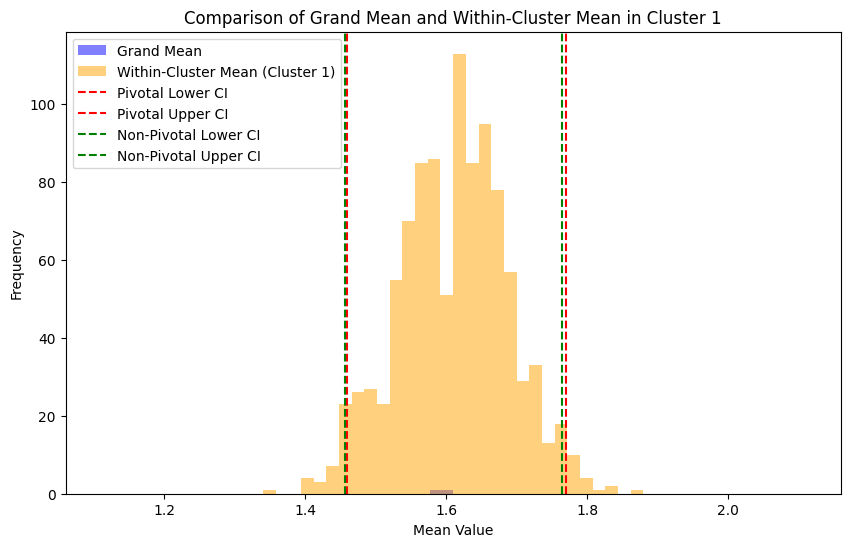

In [93]:
import matplotlib.pyplot as plt



# Create histograms for the grand mean and within-cluster mean in Cluster 1
plt.figure(figsize=(10, 6))

# Histogram for the grand mean
plt.hist([grand_mean], bins=30, alpha=0.5, color='blue', label='Grand Mean')

# Histogram for the within-cluster mean in Cluster 1
plt.hist(within_means_cluster1, bins=30, alpha=0.5, color='orange', label='Within-Cluster Mean (Cluster 1)')

# Plot vertical lines for pivotal confidence intervals
plt.axvline(x=confidence_interval_within_pivotal[0], color='red', linestyle='--', label='Pivotal Lower CI')
plt.axvline(x=confidence_interval_within_pivotal[1], color='red', linestyle='--', label='Pivotal Upper CI')

# Plot vertical lines for non-pivotal confidence intervals
plt.axvline(x=confidence_interval_within_non_pivotal[0], color='green', linestyle='--', label='Non-Pivotal Lower CI')
plt.axvline(x=confidence_interval_within_non_pivotal[1], color='green', linestyle='--', label='Non-Pivotal Upper CI')

plt.xlabel('Mean Value')
plt.ylabel('Frequency')
plt.title('Comparison of Grand Mean and Within-Cluster Mean in Cluster 1')
plt.legend()
plt.show()
